# <center>Demo on Perceptron</center>

### Import the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,f1_score

### Generate Dataset in the form of a ring

In [2]:
def genRandPointsInRing(r_in_p, r_out_p, r_in_n, r_out_n, center, n):

    r_in_arr = np.random.uniform(r_in_p, r_out_p,n)
    r_out_arr = np.random.uniform(r_in_n,r_out_n,n)
    theta_arr = np.random.uniform(0,2*np.pi,n)

    cos_theta = np.cos(theta_arr)
    sin_theta = np.sin(theta_arr)
    c1 = center[0]
    c2 = center[1]

    x_inn = c1 + np.multiply(r_in_arr,cos_theta)
    y_inn = c2 + np.multiply(r_in_arr,sin_theta)

    x_out = c1 + np.multiply(r_out_arr,cos_theta)
    y_out = c2 + np.multiply(r_out_arr,sin_theta)

    return (x_inn, x_out, y_inn, y_out)

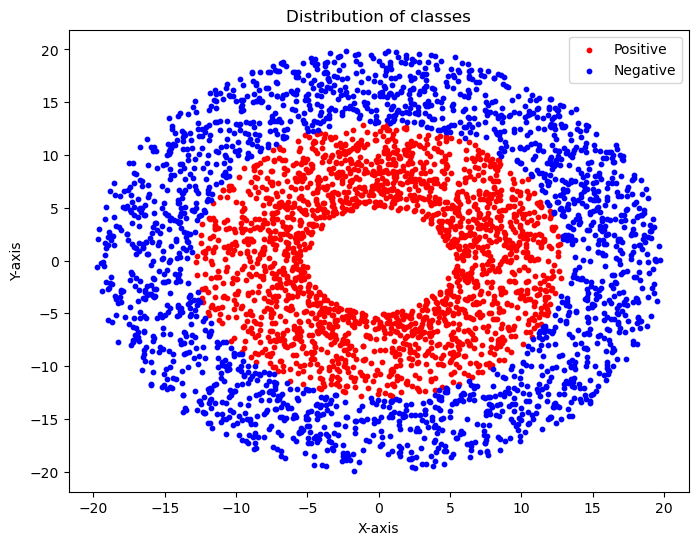

In [3]:
x_inn,x_out,y_inn,y_out = genRandPointsInRing(5,13,13,20,[0,0],2000)
plt.figure(figsize=(8,6))
plt.scatter(x_inn,y_inn,c = "red",s=10,label='Positive')
plt.scatter(x_out,y_out,c = "blue",s=10,label='Negative')
plt.legend()
plt.title("Distribution of classes")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

### Combine positive and negative class data to form the complete dataset

In [4]:
inn_arr = np.vstack((x_inn,y_inn)).T
#print(inn_arr.shape)
y_inn = np.array([1 for i in range(inn_arr.shape[0])])
#print(y_inn.shape)

out_arr = np.vstack((x_out,y_out)).T
#print(out_arr.shape)
y_out = np.array([0 for i in range(out_arr.shape[0])])

overall_arr = np.vstack((inn_arr,out_arr))
print(overall_arr.shape)
overall_y = np.hstack((y_inn,y_out))
#print(overall_y.shape)

data = np.hstack((overall_arr,np.matrix(overall_y).T))
print(data.shape)
np.random.shuffle(data)

(4000, 2)
(4000, 3)


### Split the data into training and testing sets

In [5]:
data=np.asarray(data)

In [6]:
X, y = data[:,:-1],data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Train a perceptron on this data set and report accuracy on testing set

In [7]:
clf = Perceptron(random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score:",accuracy_score(np.ravel(y_test),y_pred))
print("F1 Score:",f1_score(np.ravel(y_test),y_pred))

Accuracy Score: 0.52
F1 Score: 0.5126903553299492


### Visualize the decision boundary for this perceptron

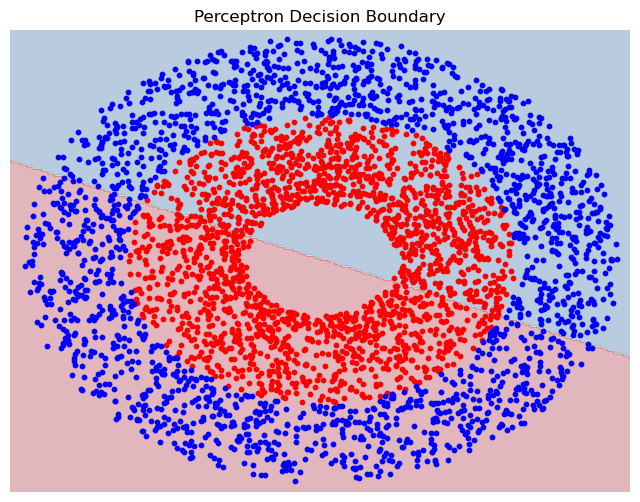

In [8]:
h = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
fig, ax = plt.subplots(figsize=(8,6))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu_r, alpha=0.3)
ax.axis('off')

# Plot also the training points
plt.scatter(inn_arr[:,0],inn_arr[:,1],s=10,c="r")
plt.scatter(out_arr[:,0],out_arr[:,1],s=10,c="b")
ax.set_title('Perceptron Decision Boundary')
plt.show()

### Map the data to some other space and visualize the data

In [9]:
def circletoLine(inn_arr):
    x = inn_arr[:,0]
    y = inn_arr[:,1]
    z = np.sqrt(np.square(x)+np.square(y))
    theta = np.arctan(y/x)
    return(z,theta)

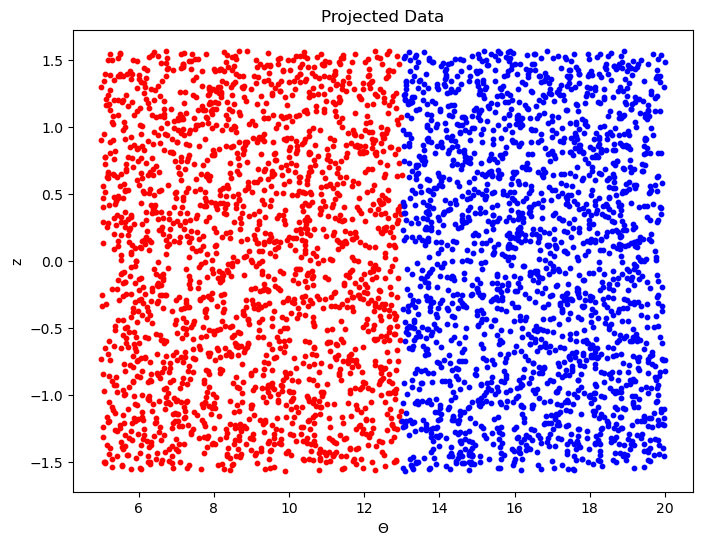

In [10]:
z1,theta1 = circletoLine(inn_arr)
z2,theta2 = circletoLine(out_arr)
plt.figure(figsize=(8,6))
plt.scatter(z1,theta1,s=10,c="r")
plt.scatter(z2,theta2,s=10,c="b")
plt.xlabel("$\Theta$")
plt.ylabel("z")
plt.title("Projected Data")
plt.show()

### Train a perceptron on this transformed data

In [11]:
inn_arr_2 = np.vstack((z1,theta1)).T
out_arr_2 = np.vstack((z2,theta2)).T
linear_arr = np.vstack((inn_arr_2,out_arr_2))
linear_data = np.hstack((linear_arr,np.matrix(overall_y).T))
print(linear_data.shape)

(4000, 3)


In [12]:
linear_data=np.asarray(linear_data)

In [13]:
X,y = linear_data[:,:-1],linear_data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [14]:
clf = Perceptron()
clf.fit(X_train,np.ravel(y_train))
y_pred = clf.predict(X_test)
print("Accuracy Score:",accuracy_score(np.ravel(y_test),y_pred))
print("F1 Score:",f1_score(np.ravel(y_test),y_pred))

Accuracy Score: 0.9075
F1 Score: 0.9116945107398569


### Visualize the decision boundary

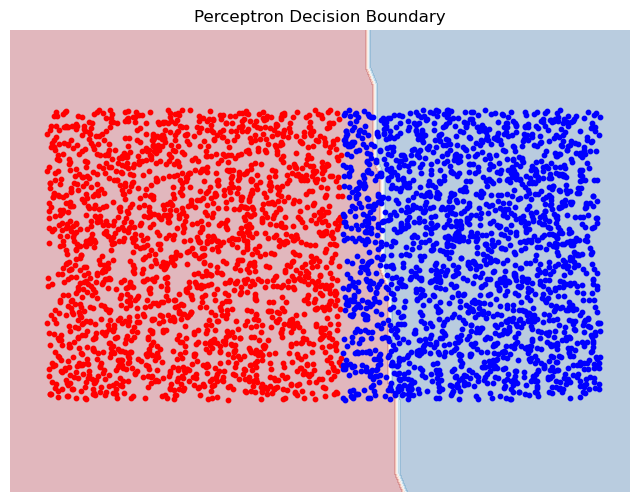

In [15]:
h = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax1 = plt.subplots(figsize=(8,6))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
ax1.contourf(xx, yy, Z, cmap=plt.cm.RdBu_r, alpha=0.3)
ax1.axis('off')

# Plot also the training points
plt.scatter(inn_arr_2[:,0],inn_arr_2[:,1],s=10,c="r")
plt.scatter(out_arr_2[:,0],out_arr_2[:,1],s=10,c="b")
ax1.set_title('Perceptron Decision Boundary')
plt.show()

### Effect of data normalization on Perceptron performance

In [16]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X1 = data.data
y1 = data.target



In [17]:
X1

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [18]:
norm_scheme_1 = StandardScaler()
# norm_scheme_1 = MinMaxScaler()
norm_scheme_1.fit(X1)
print(norm_scheme_1.mean_)

[1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02]


In [19]:
X2 = norm_scheme_1.transform(X1)

X_train,X_test,y_train,y_test = train_test_split(X2,y1,test_size=0.2)

In [20]:
clf = Perceptron(random_state=42)
clf.fit(X_train,np.ravel(y_train))
y_pred = clf.predict(X_test)
print("Accuracy Score of our classifier is: {}".format(accuracy_score(np.ravel(y_test),y_pred)))
print("F1 Score of our classifier is: {}".format(f1_score(np.ravel(y_test),y_pred)))

Accuracy Score of our classifier is: 0.9736842105263158
F1 Score of our classifier is: 0.9798657718120806


## Min max scalar

In [21]:
from sklearn.preprocessing import MinMaxScaler
norm_scheme_2 = MinMaxScaler()
norm_scheme_2.fit(X1)
print(norm_scheme_2.data_max_)
print(norm_scheme_2.data_min_)
print(norm_scheme_2.data_range_)

[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
[2.11290e+01 2.95700e+01 1.44710e+02 2.35750e+03 1.10770e-01 3.26020e-01
 4.26800e-01 2.01200e-01 1.98000e-01 4.74800e-02 2.76150e+00 4.52480e+00
 2.12230e+01 5.35398e+02 2.94170e-02 1.33148e-01 3.96000e-01 5.27900e-02
 7.10680e-02 2.89452e-02 2.81100e+01 3.75200e+01 2.00790e+02 4.06880e+03
 1.51430e-01 1.03071e+00 1.25200e+00 2.91000e-01 5.07300e-01 1.52460e-01]


In [22]:
X3 = norm_scheme_2.transform(X1)

X_train,X_test,y_train,y_test = train_test_split(X3,y1,test_size=0.2)

In [23]:
clf = Perceptron(random_state=42)
clf.fit(X_train,np.ravel(y_train))
y_pred = clf.predict(X_test)
print("Accuracy Score of our classifier is: {}".format(accuracy_score(np.ravel(y_test),y_pred)))
print("F1 Score of our classifier is: {}".format(f1_score(np.ravel(y_test),y_pred)))

Accuracy Score of our classifier is: 0.956140350877193
F1 Score of our classifier is: 0.9659863945578232
